In [1]:
import pandas as pd
import os

f = open("hotfolder/hot_takes.txt", "r")

hottakeFile=os.path.join('hotfolder','hot_takes.txt')
allhottake=pd.read_table(hottakeFile,header=None)

# see the text
allhottake

,0
0,Seven hot takes for the NBA playoffs
1,"Published: Apr. 25, 2024, 11:14 a.m."
2,By Jeremy Block | Sidelines Group
3,"As the NBA playoffs unfold this season, it’s b..."
4,Join us as we breakdown seven hot takes for th...
5,1. Timberwolves secure spot in Western Confere...
6,Minnesota has been cruising in high gear this ...
7,Despite speculation surrounding whether Phoeni...
8,The Timberwolves have showcased superior teamw...
9,"With their current level of play, it’s highly ..."


In [2]:
#Tokenizar

In [3]:
import nltk
from nltk.tokenize import word_tokenize

allhottake['tokenized_text'] = allhottake[0].apply(nltk.word_tokenize)
print(allhottake.head())

                                                   0  \
0               Seven hot takes for the NBA playoffs   
1               Published: Apr. 25, 2024, 11:14 a.m.   
2                  By Jeremy Block | Sidelines Group   
3  As the NBA playoffs unfold this season, it’s b...   
4  Join us as we breakdown seven hot takes for th...   

                                      tokenized_text  
0       [Seven, hot, takes, for, the, NBA, playoffs]  
1  [Published, :, Apr, ., 25, ,, 2024, ,, 11:14, ...  
2           [By, Jeremy, Block, |, Sidelines, Group]  
3  [As, the, NBA, playoffs, unfold, this, season,...  
4  [Join, us, as, we, breakdown, seven, hot, take...  


In [4]:
import pandas as pd

exploded_df = allhottake.explode('tokenized_text')

wordInSeries = exploded_df['tokenized_text']

print(wordInSeries)

0                       Seven
0                         hot
0                       takes
0                         for
0                         the
               ...           
38                         at
38                      https
38                          :
38    //www.michigan.gov/mgcb
38                          .
Name: tokenized_text, Length: 1508, dtype: object


In [5]:
#Limpiando tokens:

In [6]:
wordInSeries=wordInSeries[~wordInSeries.str.startswith('http')].reset_index(drop=True)
wordInSeries

0                         Seven
1                           hot
2                         takes
3                           for
4                           the
                 ...           
1502                    website
1503                         at
1504                          :
1505    //www.michigan.gov/mgcb
1506                          .
Name: tokenized_text, Length: 1507, dtype: object

In [7]:
wordInSeries=wordInSeries.str.replace('[^\x01-\x7F]','')
wordInSeries=wordInSeries.str.replace('&amp;','and')
wordInSeries=wordInSeries.str.replace('&lt;|&gt;','')
wordInSeries=wordInSeries.str.replace('’','')
wordInSeries

0                         Seven
1                           hot
2                         takes
3                           for
4                           the
                 ...           
1502                    website
1503                         at
1504                          :
1505    //www.michigan.gov/mgcb
1506                          .
Name: tokenized_text, Length: 1507, dtype: object

In [8]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
wordInSeries=wordInSeries.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
wordInSeries=wordInSeries.str.lower()
wordInSeries

0                    seven
1                      hot
2                    takes
3                      for
4                      the
               ...        
1502               website
1503                    at
1504                      
1505    wwwmichigangovmgcb
1506                      
Name: tokenized_text, Length: 1507, dtype: object

In [9]:
#Tokens relevantes

In [10]:
wordInSeries.value_counts()

tokenized_text
                      194
the                    80
and                    36
a                      34
in                     26
                     ... 
125108                  1
outright                1
latest                  1
picked                  1
wwwmichigangovmgcb      1
Name: count, Length: 599, dtype: int64

In [11]:
## Stop words:

In [12]:
from nltk.corpus import stopwords
STOPS = stopwords.words('english')


wordInSeries=wordInSeries[~wordInSeries.isin(STOPS)].reset_index(drop=True)
wordInSeries

0                   seven
1                     hot
2                   takes
3                     nba
4                playoffs
              ...        
976                 board
977               website
978                      
979    wwwmichigangovmgcb
980                      
Name: tokenized_text, Length: 981, dtype: object

In [13]:
# Word Frenquency:

In [14]:
wordInSeries.value_counts()

tokenized_text
                      194
series                 15
knicks                 11
game                    9
points                  8
                     ... 
outright                1
latest                  1
picked                  1
talent                  1
wwwmichigangovmgcb      1
Name: count, Length: 520, dtype: int64

<Axes: ylabel='Frequency'>

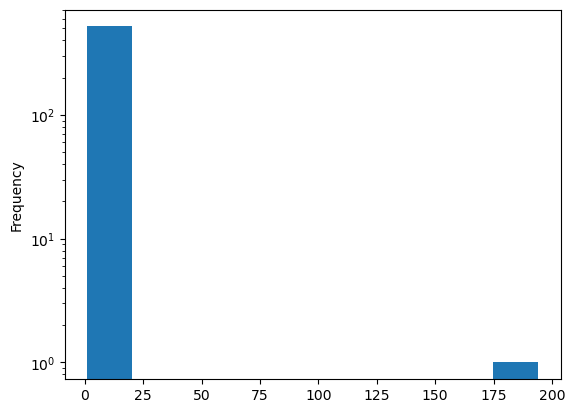

In [15]:
wordInSeries.value_counts().plot(logy=True, kind='hist')

In [16]:
FrequencyallhotTokens=wordInSeries.value_counts()[wordInSeries.value_counts()>5]
FrequencyallhotTokens

tokenized_text
             194
series        15
knicks        11
game           9
points         8
heat           7
nba            7
offensive      7
lineup         6
team           6
gordon         6
shooting       6
Name: count, dtype: int64

In [17]:
FrequencyallhotTokens.to_dict()

{'': 194,
 'series': 15,
 'knicks': 11,
 'game': 9,
 'points': 8,
 'heat': 7,
 'nba': 7,
 'offensive': 7,
 'lineup': 6,
 'team': 6,
 'gordon': 6,
 'shooting': 6}

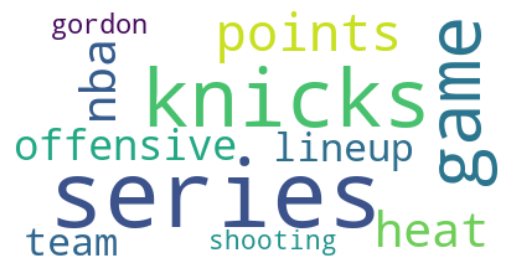

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyallhotTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# Bigrams:

In [20]:
allhottake

,0,tokenized_text
0,Seven hot takes for the NBA playoffs,"[Seven, hot, takes, for, the, NBA, playoffs]"
1,"Published: Apr. 25, 2024, 11:14 a.m.","[Published, :, Apr, ., 25, ,, 2024, ,, 11:14, ..."
2,By Jeremy Block | Sidelines Group,"[By, Jeremy, Block, |, Sidelines, Group]"
3,"As the NBA playoffs unfold this season, it’s b...","[As, the, NBA, playoffs, unfold, this, season,..."
4,Join us as we breakdown seven hot takes for th...,"[Join, us, as, we, breakdown, seven, hot, take..."
5,1. Timberwolves secure spot in Western Confere...,"[1, ., Timberwolves, secure, spot, in, Western..."
6,Minnesota has been cruising in high gear this ...,"[Minnesota, has, been, cruising, in, high, gea..."
7,Despite speculation surrounding whether Phoeni...,"[Despite, speculation, surrounding, whether, P..."
8,The Timberwolves have showcased superior teamw...,"[The, Timberwolves, have, showcased, superior,..."
9,"With their current level of play, it’s highly ...","[With, their, current, level, of, play, ,, it,..."


In [21]:
# Normalize text - lowercase:

In [22]:
allhottake[0]=allhottake[0].str.lower()
allhottake[0]=allhottake[0].str.replace('['+PUNCs+']', '',regex=True)

In [23]:
# Create bigrams

In [24]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allhottake[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

[('seven', 'hot'),
 ('hot', 'takes'),
 ('takes', 'for'),
 ('for', 'the'),
 ('the', 'nba'),
 ('nba', 'playoffs'),
 ('published', 'apr'),
 ('apr', '25'),
 ('25', '2024'),
 ('2024', '1114'),
 ('1114', 'am'),
 ('by', 'jeremy'),
 ('jeremy', 'block'),
 ('block', 'sidelines'),
 ('sidelines', 'group'),
 ('as', 'the'),
 ('the', 'nba'),
 ('nba', 'playoffs'),
 ('playoffs', 'unfold'),
 ('unfold', 'this'),
 ('this', 'season'),
 ('season', 'it’s'),
 ('it’s', 'been'),
 ('been', 'complete'),
 ('complete', 'exhilarating'),
 ('exhilarating', 'intensity'),
 ('intensity', 'and'),
 ('and', 'electrifying'),
 ('electrifying', 'action'),
 ('action', 'already'),
 ('already', 'we’ve'),
 ('we’ve', 'witnessed'),
 ('witnessed', 'heartstopping'),
 ('heartstopping', 'buzzerbeaters'),
 ('buzzerbeaters', 'young'),
 ('young', 'rising'),
 ('rising', 'stars'),
 ('stars', 'outshining'),
 ('outshining', 'seasoned'),
 ('seasoned', 'veterans'),
 ('veterans', 'and'),
 ('and', 'court'),
 ('court', 'rivalries'),
 ('rivalries', 

In [25]:
# Stop words: 

In [26]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

[('seven', 'hot'), ('hot', 'takes'), ('nba', 'playoffs'), ('published', 'apr'), ('apr', '25'), ('25', '2024'), ('2024', '1114'), ('jeremy', 'block'), ('block', 'sidelines'), ('sidelines', 'group'), ('nba', 'playoffs'), ('playoffs', 'unfold'), ('season', 'it’s'), ('complete', 'exhilarating'), ('exhilarating', 'intensity'), ('electrifying', 'action'), ('action', 'already'), ('already', 'we’ve'), ('we’ve', 'witnessed'), ('witnessed', 'heartstopping'), ('heartstopping', 'buzzerbeaters'), ('buzzerbeaters', 'young'), ('young', 'rising'), ('rising', 'stars'), ('stars', 'outshining'), ('outshining', 'seasoned'), ('seasoned', 'veterans'), ('court', 'rivalries'), ('rivalries', 'escalating'), ('heating', 'exchanges'), ('exchanges', 'mid'), ('mid', 'game'), ('first', 'series'), ('lies', 'ahead'), ('join', 'us'), ('breakdown', 'seven'), ('seven', 'hot'), ('hot', 'takes'), ('year’s', 'nba'), ('nba', 'playoffs'), ('playoffs', 'let’s'), ('get', 'right'), ('1', 'timberwolves'), ('timberwolves', 'secure

In [27]:
# Word frenquency: 

In [28]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

,theBigram,weight
0,"(nba, playoffs)",3
1,"(eric, gordon)",3
2,"(seven, hot)",2
3,"(hot, takes)",2
4,"(sidelines, group)",2
...,...,...
429,"(call, 1800gambler)",1
430,"(michigan, gaming)",1
431,"(gaming, control)",1
432,"(control, boards)",1


In [29]:
# Creación y uso de columnas

In [30]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

,theBigram,weight,word1,word2
0,"(nba, playoffs)",3,nba,playoffs
1,"(eric, gordon)",3,eric,gordon
2,"(seven, hot)",2,seven,hot
3,"(hot, takes)",2,hot,takes
4,"(sidelines, group)",2,sidelines,group
...,...,...,...,...
429,"(call, 1800gambler)",1,call,1800gambler
430,"(michigan, gaming)",1,michigan,gaming
431,"(gaming, control)",1,gaming,control
432,"(control, boards)",1,control,boards


In [31]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

In [32]:
# Plotting: 

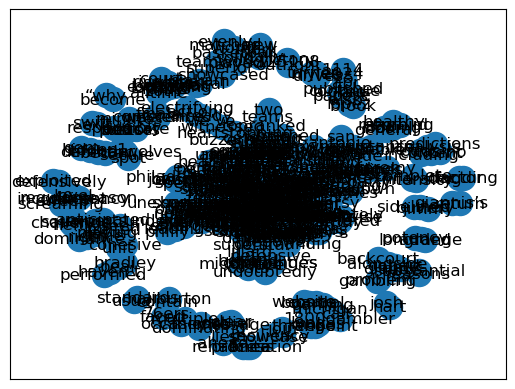

In [33]:
nx.draw_networkx(G_bigram)

In [34]:
# Subsetting

In [35]:
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

In [36]:
# New plot: 

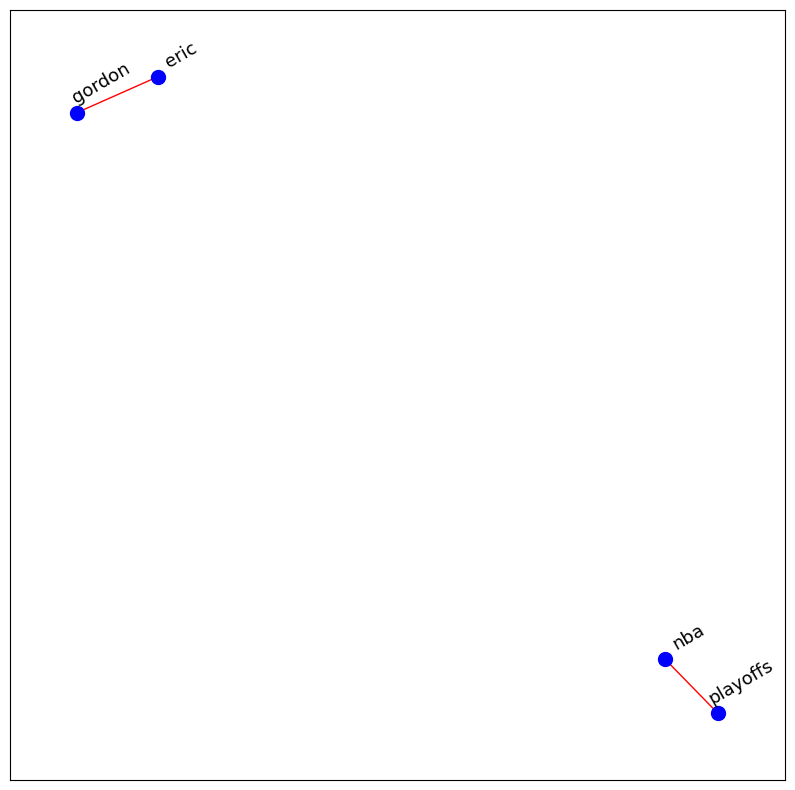

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='blue',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)
    
plt.show()

In [38]:
# Fixing labels distance:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\2541486982.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])


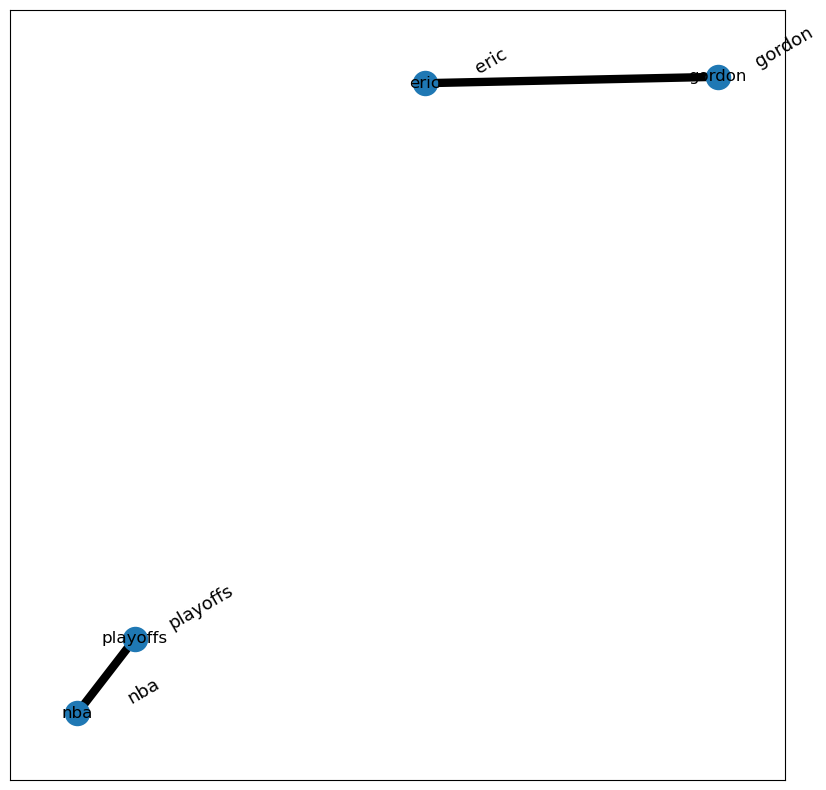

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])
